# Regularization

Mô hình Deep Learning có sự sự linh hoạt và khả năng học rất cao, đến mức vấn đề overfitting có thể trở nên nghiêm trọng nếu training dataset không đủ lớn. Khi mô hình bị overfitting, chúng sẽ có độ chính xác rất cao trên tập train, nhưng thực tế mô hình không tổng quát hóa được sự khác biệt của các dữ liệu, từ đó dẫn đến lỗi cao khi thử trên tập test (gồm các mẫu mà mô hình chưa gặp).

Regularization là một phương pháp làm giảm độ phức tạp của mô hình nhằm tránh overfitting. Trong bài tập này các bạn sẽ được trực quan hóa vấn đề overfitting và hiệu quả sau khi áp dụng regularization. Các bạn có thể thấy độ chính xác trên tập test có thể được giảm đáng kể sau khi áp dụng regularization 🤩🤩🤩.

Đầu tiên hãy import các package cần thiết.

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from c2_a2_reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from c2_a2_reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from c2_a2_testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

**Vấn đề**: Bạn được liên đoàn bóng đá Pháp tuyển dụng vào vị trí chuyên gia AI. Nhiệm vụ của bạn là phân tích dữ liệu để đưa ra gợi ý thủ môn đội Pháp nên phát bóng lên vị trí nào trên sân để tuyển thủ Pháp có thể nhận được bằng đầu.

<div>
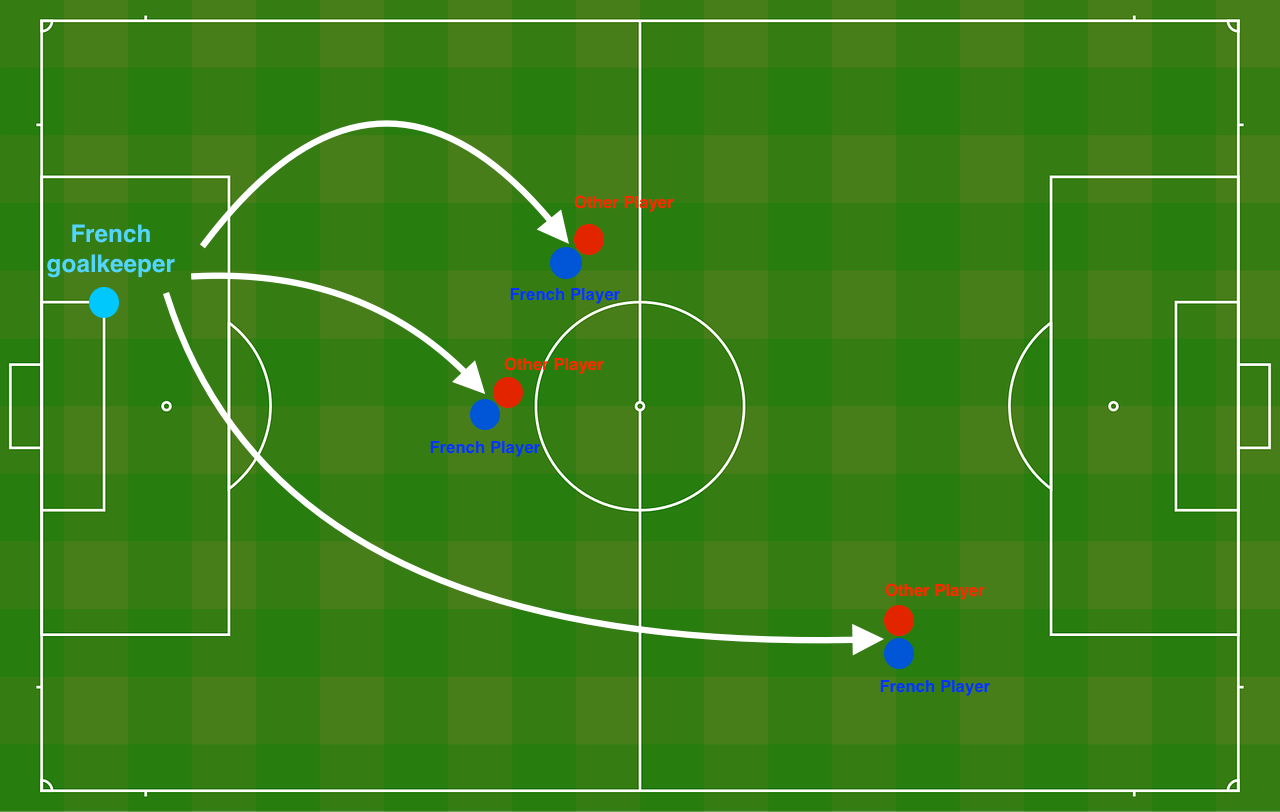
</div>

<caption><center> <u> **Hình 1** </u>: **Football field**<br> Thủ môn phát bóng, cầu thủ hai đội tranh nhau nhận bóng</center></caption>


Bạn nhận được dataset được thu thập từ 10 trận đấu trước của đội Pháp ở dạng 2D dưới đây:


In [ ]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Mỗi điểm là một ví trí mà thủ môn đã phát bóng lên. Tại các điểm màu xanh thì cầu thủ Pháp đã nhận được, còn ở các điểm màu đỏ thì đối thủ đã nhận được bóng.

Mục tiêu của bạn là dùng mô hình NN để xác định vị trí phát bóng lên mà cầu thủ Pháp sẽ nhận được.

Đầu tiên bạn sẽ thử mô hình non-regularized. Sau đó bạn sẽ học cách dùng regularization và cuối cùng quyết định mô hình nào nên dùng. 

## 1 - Non-regularized model

You will use the following neural network (already implemented for you below). This model can be used:
- in *regularization mode* -- by setting the `lamda` input to a non-zero value. 
- in *dropout mode* -- by setting the `keep_prob` to a value less than one

You will first try the model without any regularization. Then, you will implement:
- *L2 regularization* -- functions: "`compute_cost_with_regularization()`" and "`backward_propagation_with_regularization()`"
- *Dropout* -- functions: "`forward_propagation_with_dropout()`" and "`backward_propagation_with_dropout()`"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarize yourself with the model.

In [ ]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lamda = 0, keep_probs = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lamda -- regularization hyperparameter, scalar
    keep_probs - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if not isinstance(keep_probs,list) and keep_probs >= 1:
            a3, cache = forward_propagation(X, parameters)
        else:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_probs)
        
        # Cost function
        if lamda == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lamda)
            
        # Backward propagation.
        assert(lamda==0 or keep_probs==1)    # L2 regularization và dropout có thể cài đặt cùng lúc, 
                                            # nhưng trong bài tập này tại mỗi thời điểm ta chỉ sử dụng 1 trong 2 phương pháp
        if lamda == 0 and  not isinstance(keep_probs,list) and keep_probs >= 1:
            grads = backward_propagation(X, Y, cache)
        elif lamda != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lamda)
        else:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_probs)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Hãy thử train mô hình không có regularization và xem độ chính xác trên tập train/test.

In [ ]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Độ chính xác trên tập test là 91.5%, cũng không tệ. Hãy xem decision boundary của mô hình này.

In [ ]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

Mô hình này rõ ràng đã bị overfitting vì nó fit với cả những dữ liệu nhiễu (như 2 điểm đỏ bên phần xanh, và một điểm xanh trên phần đỏ). 

Hãy xem hai kỹ thuật regularization làm được gì để khắc phục điều này nhé.

## 2 - L2 Regularization

Cách cơ bản đề tránh overfitting là **L2 regularization**. Để thực hiện L2 regularization, bạn cần thay đổi cross-entropy cost function từ dạng:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
Sang dạng:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Bài tập 1: Hãy cài đặt hàm tính cost với L2 regularization.

Hướng dẫn: Hàm cost dạng mới là tổng của 2 phần. Phần đầu là cross-entropy cost (được tính bằng hàm compute_cost, và phần sau là L2 regularization cost. 

Để tính L2 regularization cost, đầu tiên ta cần tính tổng bình phương của các phần tử $W^{[l]}$ trên L layer. Sau đó ta nhân tổng bình phương này với $ \frac{1}{m} \frac{\lambda}{2} $. 

Ở bài tập này thì Neural Network có số layer cố định là 3 (không kể input layer), nên ta chỉ có 3 ma trận weight gồm W1, W2, và W3. Như vậy ta chỉ cần tính tổng bình phương các phần tử của 3 ma trận này và nhân tổng đấy với $ \frac{1}{m} \frac{\lambda}{2} $. 

Để tính tổng bình phương các phần tử của ma trận $W^{[l]}$, ta dùng hàm:
```python
np.sum(np.square(Wl))
```


In [ ]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(A3, Y, parameters, lamda):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # Tính cross-entropy cost
    
    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = 
    ### END CODER HERE ###
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [ ]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lamda = 0.1)))

**Expected Output**: 

<table> 
    <tr>
        <td>
        **cost**
        </td>
        <td>
        1.78648594516
        </td>    
    </tr>
</table> 

Do ta thay đổi hàm tính cost nên ta cần phải thay đổi hàm backward propagation. Tất cả các gradient được tính với hàm cost mới.

Bài tập 2: Cài đặt hàm backward propagation cho L2 regularization.

Hướng dẫn: trong các gradient da, dw, db thì chỉ có dw là cần thay đổi (vì thành phần L2 regularization cost chỉ bao gồm W). 

Cụ thể hơn, ta sẽ tính dw như trước đây, và cộng thêm $\frac{\lambda}{m} W$.

Tức là $dW_{new} = dW_{before} + \frac{\lambda}{m} W$




In [ ]:
# GRADED FUNCTION: backward_propagation_with_regularization

def backward_propagation_with_regularization(X, Y, cache, lamda):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lamda -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3before = 1./m * np.dot(dZ3, A2.T)
    
    ### START CODE HERE ### (approx. 1 line)
    dW3 = dW3before + 
    ### END CODE HERE ###
    
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dZ2before = 1./m * np.dot(dZ2, A1.T)
    
    ### START CODE HERE ### (approx. 1 line)
    dW2 = dZ2before + 
    ### END CODE HERE ###
    
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1before = 1./m * np.dot(dZ1, X.T)
    
    ### START CODE HERE ### (approx. 1 line)
    dW1 = dW1before + 
    ### END CODE HERE ###
    
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [ ]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lamda = 0.7)
print ("dW1 = "+ str(grads["dW1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("dW3 = "+ str(grads["dW3"]))

**Expected Output**:

<table> 
    <tr>
    <td>
    **dW1**
    </td>
        <td>
    [[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
    </td>
    </tr>
    <tr>
    <td>
    **dW2**
    </td>
        <td>
    [[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
    </td>
    </tr>
    <tr>
    <td>
    **dW3**
    </td>
        <td>
    [[-1.77691347 -0.11832879 -0.09397446]]
    </td>
    </tr>
</table> 

Let's now run the model with L2 regularization $(\lambda = 0.7)$. The `model()` function will call: 
- `compute_cost_with_regularization` instead of `compute_cost`
- `backward_propagation_with_regularization` instead of `backward_propagation`

In [ ]:
parameters = model(train_X, train_Y, lamda = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Như vậy độ chính xác trên tập test đã được nâng lên 93%. Hãy plot thử decision boundary.

In [ ]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

**Nhật xet**:
- $\lambda$ là một hyperparameter mà bạn cần chọn giá trị của nó qua dev set.
- L2 regularization làm cho đường biên phân loại mượt hơn. Mượt hơn ở đây nghĩa là đường biên sẽ không thể gom luôn các dữ liệu nhiễu. Nếu $\lambda$ quá lớn, đường biên phân loại sẽ bị làm mượt quá đà (oversmooth) và sẽ làm mô hình có high bias (tức là không tổng quát hóa được dữ liệu tốt và sẽ có lỗi cao trên tập train).

**L2-regularization thật sự đã làm gì để giảm overfitting?**:

L2-regularization dựa trên một giả sử là mô hình với weight nhỏ sẽ đơn giản hơn mô hình với weight lớn. Như vậy bằng cách thêm W vào cost, khi ta giảm cost thì ta sẽ giảm luôn W. Kết quả là W sẽ nhỏ hơn trước đây và mô hình sẽ đơn giản hơn nên sẽ tránh được overfitting. Dĩ nhiên nều W nhỏ quá thì mô hình sẽ trở nên đơn giản quá không tổng quát hóa được dữ liệu. Do đó ta cần phải điều chỉnh $\lambda$ để mô hình đạt được điểm tối ưu nhất giữa underfitting và overfitting.   



## 3 - Dropout

Dropout là kỹ thuật regularization được sử dụng trong AlexNet năm 2012 (một trong những cấu trúc Deep Learning nổi tiếng nhất). 

Ý tưởng của dropout rất đơn giản, và cũng rất khó tin: ngẫu nhiên vô hiệu hóa một số neuron ở mỗi lần lặp. Hãy xem hình dưới đây để thấy cách hoạt động của dropout.



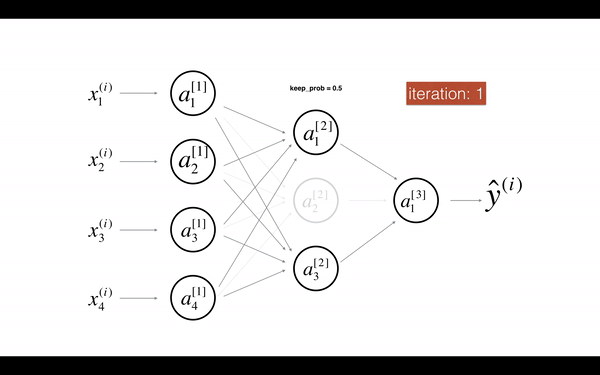

<caption><center> <u> Figure 2 </u>: Drop-out on the second hidden layer.  </center></caption>

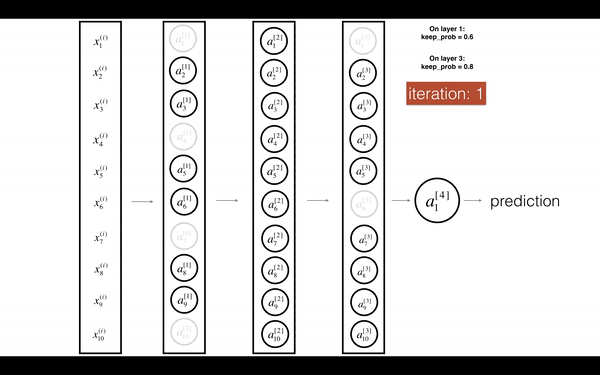

<caption><center> <u> Figure 3 </u>: Drop-out on the first and third hidden layers.  </center></caption>


Khi bạn vô hiệu hóa ngẫu nhiên các neuron, bạn ép mạng phải học tất cả các feature của dữ liệu chứ không dựa vào quá nhiều một số ít các feature nào đấy vì ở mỗi lần lặp các feature đấy có thể sẽ không tồn tại do neuron gắn liền với chung đã bị vô hiệu hóa. Nói cách khác, các trọng số (weight) sau khi áp dụng dropout sẽ được phân bố đều cho tất cả các feature. Do đó mô hình sẽ có khả năng học được cấu trúc chung của dữ liệu hơn là các cấu trúc chi tiết (dẫn đến overfitting).

### 3.1 - Forward propagation with dropout

Bài tập 3: cài đặt forward propagation với dropout.

**Hướng dẫn**:
Bạn muốn ngắt kết nối của một vài neurons ở layer thứ nhất và thứ hai. Để làm điều đó, bạn thực hiện 4 bước sau: 
1. Tạo một ma trận ngẫu nhiên $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ có cùng kích thước với $A^{[1]}$.
2. Mỗi phần tử của $D^{[1]}$ sẽ có giá trị ngẫu nhiên 0 hoặc 1, trong đó xác suất nhận giá trị 1 là `keep_prob'.
3. Set $A^{[1]}$ = $A^{[1]} * D^{[1]}$. Ta thấy khi một phần tử của $D^{[1]}$ bằng 0 thì phần tử của $A^{[1]}$ tương ứng cũng bằng 0, tức là neuron đó đã bị loại bỏ. Bạn có thể hình dung $D^{[1]}$ như là một mặt nạ được đặt lên $A^{[1]}$ để loại bỏ một vài neurons của  $A^{[1]}$.
4. Chia $A^{[1]}$ cho `keep_prob`. Bằng cách này, bạn có thể đảm bảo kì vọng (expected value) của giá trị cost sẽ không đổi so với không có drop-out. (Kỹ thuật này gọi là inverted dropout.)

In [ ]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_probs):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_probs - probabilities of keeping a neuron in each layer active during drop-out, array
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    keep_prob_layer1 = keep_probs[0]  #xác suất để giữ một neuron ở layer 1
    keep_prob_layer2 = keep_probs[1]  #xác suất để giữ một neuron ở layer 2
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    ### START CODE HERE ### (approx. 4 lines)         # Thực hiện 4 bước được mô tả ở trên 
    D1 = np.random.rand(A1.shape[0],A1.shape[1])      # Step 1: Khởi tạo ma trận D1 có cùng kích thước với A1
    D1 =                                              # Step 2: Set giá trị các phần tử trong D1 thành 0 hoặc 1 tùy theo keep_prob
    A1 =                                              # Step 3: loại bỏ vài neuron trong A1
    A1 =                                              # Step 4: chỉnh lại độ lớn của các thành phần (khác 0) trong A1
    ### END CODE HERE ###
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ### START CODE HERE ### (approx. 4 lines)
    D2 =  np.random.rand(A2.shape[0],A2.shape[1])     # Step 1: Khởi tạo ma trận D2 có cùng kích thước với A2
    D2 =  D2 < keep_prob_layer2                       # Step 2: Set giá trị các phần tử trong D2 thành 0 hoặc 1 tùy theo keep_pro
    A2 =                                              # Step 3: loại bỏ vài neuron trong A2
    A2 =                                              # Step 4: chỉnh lại độ lớn của các thành phần (khác 0) trong A2
    ### END CODE HERE ###
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [ ]:
X_assess, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(X_assess, parameters, [0.7, 0.7])
print ("A3 = " + str(A3))

**Expected Output**: 

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]

### 3.2 - Backward propagation with dropout

**Bài tập**: Cài đặt backward propagation với dropout sử dụng mặt nạ $D^{[1]}$ và $D^{[2]}$ chứa trong cache. 

**Hướng dẫn**:
Backpropagation thật ra rất dễ. Các bạn cần thực hiện 2 bước:
1. Ở forward propagation, các bạn loại bỏ các neuron bằng cách áp dụng mask $D^{[1]}$ lên `A1`. Ở backpropagation, các bạn sẽ loại bỏ cùng các neuron đấy bằng cách áp dụng mask $D^{[1]}$ lên `dA1`. 
2. Ở forward propagation, các bạn chia `A1` cho `keep_prob`. Ở backpropagation, các bạn sẽ chia `dA1` cho `keep_prob`. (Do giá trị của $A^{[1]}$ thay đổi theo `keep_prob`thì đạo hàm của nó $dA^{[1]}$ cũng thay đổi như thế.)


In [ ]:
# GRADED FUNCTION: backward_propagation_with_dropout

def backward_propagation_with_dropout(X, Y, cache, keep_probs):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_probs - probability of keeping a neuron active in each layer during drop-out, array
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    keep_prob_layer1 = keep_probs[0]  #xác suất để giữ một neuron ở layer 1
    keep_prob_layer2 = keep_probs[1]  #xác suất để giữ một neuron ở layer 2
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)

    dA2 = dA2*D2                           # Step 1: Áp dụng mask D2 lên dA2
    dA2 = dA2/keep_prob_layer2             # Step 2: Thay đổi giá trị dA2 theo keep_prob_layer2

    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    
    ### START CODE HERE ### (≈ 2 lines of code)
    dA1 =                                  # Step 1: Áp dụng mask D1 lên dA1
    dA1 =                                  # Step 2: Thay đổi giá trị dA2 theo keep_prob_layer1
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [ ]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(X_assess, Y_assess, cache, [0.8,0.8])

print ("dA1 = " + str(gradients["dA1"]))
print ("dA2 = " + str(gradients["dA2"]))

Expected Output:

dA1 = 

   [[ 0.36544439  0.         -0.00188233  0.         -0.17408748]

   [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
 
dA2 =  
   [[ 0.58180856  0.         -0.00299679  0.         -0.27715731]

   [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 
   [ 0.          0.         -0.00292733  0.         -0.        ]]

### 3.3 - Let's now run the model with dropout

Hãy thử nghiệm mô hình với dropout. Ta sẽ cho xác suất dropout ở layer 1 và layer 2 đều bằng 0.86. Điều này có nghĩa là ở mỗi iteration, ta sẽ loại bỏ một số neuron trong 2 layer này, và mỗi neuron sẽ có 24% khả năng bị loại bỏ. Chú ý là layer có nhiều tham số hơn (ma trận W tại layer đó có kích thước lớn hơn) thì cần loại nhiều neuron hơn, nên xác suất giữ (keep_prob) ở những layer nhiều tham số sẽ nhỏ hơn. Trong bài tập này số lượng tham số ở layer 2 nhiều hơn nhưng không đáng kể, do đó ta có thể để xác suất dropout tại hai layer bằng nhau.

Hàm `model()` sẽ gọi:
- `forward_propagation_with_dropout` thay vì `forward_propagation`.
- `backward_propagation_with_dropout` thay vì `backward_propagation`.

In [ ]:
parameters = model(train_X, train_Y, keep_probs = [0.86, 0.86], learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Như vậy bằng cách sử dụng dropout, ta đã tăng độ chính xác lên 95%. Nhờ bạn, đội tuyển quốc gia Pháp sẽ có nhiều trận thắng sắp tới hơn 🥳️🥳️🥳️.

Chạy đoạn code dưới để plot decision boundary.

In [ ]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

**Chú ý**:
- Một sai lầm thường gặp là sử dụng dropout ở cả training và testing. Thực tế, bạn chỉ sử dụng dropout khi training. Hãy nhớ không sử dụng dropout khi test.
 

## 4 - Kết luận

**Dưới đây là kết quả của 3 model**: 

<table> 
    <tr>
		<td>
			**model**
        </td>
        <td>
			**train accuracy**
        </td>
        <td>
			**test accuracy**
        </td>
    </tr>
	<tr>
        <td>
			3-layer NN without regularization
        </td>
        <td>
			95%
        </td>
        <td>
			91.5%
        </td>
	</tr>
    <tr>
        <td>
			3-layer NN with L2-regularization
        </td>
        <td>
			94%
        </td>
        <td>
			93%
        </td>
    </tr>
    <tr>
        <td>
			3-layer NN with dropout
        </td>
        <td>
			93%
        </td>
        <td>
			95%
        </td>
    </tr>
</table> 

Ta thấy regularization làm giảm train accuracy. Điều này là vì mô hình sẽ bớt overfit với training set.  

Chúc mừng các bạn đã làm xong bài tập này 🥳️🥳️🥳️🥳️.